In [4]:
import os
import pickle
import numpy as np
import pandas as pd
from typing import Any, List, Dict, Tuple
from collections import defaultdict, Counter
from google.colab import drive
drive.mount("/content/drive")
ROOT_DIR = "/content/drive/My Drive/"
PROJ_DIR = ROOT_DIR + "Term_Project_Unsupervised_Learners/"
DATA_DIR = PROJ_DIR + "data/"
FEAT_DIR = PROJ_DIR + "feature/"
path = "/content/drive/My Drive/Term_Project_Unsupervised_Learners/data/"

Mounted at /content/drive


In [5]:
idx_col_name = "id"
actor_col_name = "top5_actors"
director_col_name = "top1_director"
crew_col_name = "crew"
logrev_col_name = "log_revenue_final"
rev_col_name = "revenue_new"
year_col_name = "release_year"
prod_cmp_col_name = "production_company_class"

converters = {crew_col_name: eval, actor_col_name: eval}

data_name_dict = {
    #"subtrain": "train_sub_1980_2012_prod_comp_class_actor_director_istopk_logrev_genres.csv",
    #"val": "val_2013_2014_prod_comp_class_actor_director_istopk_logrev_genres.csv",                      
    #"train": "train_1980_2014_prod_comp_class_actor_director_istopk_logrev_genres.csv", 
    #"test": "test_2015_2017_prod_comp_class_actor_director_istopk_logrev_genres.csv"

    "subtrain": "train_sub_1990_2012_final.csv",
    "val": "val_2013_2014_final.csv",
    "train": "train_1990_2014_final.csv", 
    "test": "test_2015_2017_final.csv"

    #"subtrain": "train_sub_1980_2012_prod_comp_class_actor_director_istopk_logrev_logpop.csv",
    #"val": "val_2013_2014_prod_comp_class_actor_director_istopk_logrev_logpop.csv",                      
    #"train": "train_1980_2014_prod_comp_class_actor_director_istopk_logrev_logpop.csv", 
    #"test": "test_2015_2017_prod_comp_class_actor_director_istopk_logrev_logpop.csv"

    #"subtrain": "train_sub_1980_2012_prod_comp_class_actor_director_istopk_logrev_median.csv",
    #"val": "val_2013_2014_prod_comp_class_actor_director_istopk_logrev_median.csv",  
    #"train": "train_1980_2014_prod_comp_class_actor_director_istopk_logrev_median.csv", 
    #"test": "test_2015_2017_prod_comp_class_actor_director_istopk_logrev_median.csv"

    #"subtrain": "train_sub_1980_2012_prod_comp_class_actor_director_istopk_logrev_linear_extrapolation.csv",
    #"val": "val_2013_2014_prod_comp_class_actor_director_istopk_logrev_linear_extrapolation.csv",                      
    #"train": "train_1980_2014_prod_comp_class_actor_director_istopk_logrev_linear_extrapolation.csv", 
    #"test": "test_2015_2017_prod_comp_class_actor_director_istopk_logrev_linear_extrapolation.csv"
    
    #"subtrain": "train_sub_1980_2012_prod_comp_class_actor_director_istopk_logrev_cubic_extrapolation.csv",
    #"val": "val_2013_2014_prod_comp_class_actor_director_istopk_logrev_cubic_extrapolation.csv",                      
    #"train": "train_1980_2014_prod_comp_class_actor_director_istopk_logrev_cubic_extrapolation.csv", 
    #"test": "test_2015_2017_prod_comp_class_actor_director_istopk_logrev_cubic_extrapolation.csv"

}

nan_columns = ['Action', 'Adventure', 'Animation',
    'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
    'Foreign', 'History', 'Horror', 'Music', 'Mystery', 'Romance',
    'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western']

data_dict = {}
for data_name in data_name_dict:
    data_file_name = data_name_dict[data_name]
    data_dict[data_name] = pd.read_csv(path + data_file_name,
                                       index_col=idx_col_name,
                                       converters=converters)
    data_dict[data_name] = data_dict[data_name][data_dict[data_name]["release_year"] >= 1990]
    #data_dict[data_name].loc[:, nan_columns] = data_dict[data_name].loc[:, nan_columns].fillna(0)

In [6]:
"""
feat_col_names = [
    'log_budget_final',

    'major',
    'medium',
    'minor',

    'runtime',
    'sequel',
    'popular_genre',
    'first_in_collection',
    'gender_score',
    'has_oscar_winner',
    'title_length',

    'Documentary',
    'Family',
    'Drama',
    'Animation',
    'Fantasy',
    'Action',
    'Horror',
    'Crime',
    'Science Fiction',
    'War',  
    'History',
    'Foreign', 
    'Music',
    'Romance',
    'Mystery',
    'TV Movie',
    'Comedy',
    'Western',
    'Thriller',
    'Adventure',

    'actor_is_top_100_of_past_2_years_0',
    'actor_is_top_100_of_past_2_years_1',
    'actor_is_top_100_of_past_2_years_2',
    'actor_is_top_100_of_past_2_years_3',
    'actor_is_top_100_of_past_2_years_4',

    'actor_is_top_100_of_past_5_years_0',
    'actor_is_top_100_of_past_5_years_1',
    'actor_is_top_100_of_past_5_years_2',
    'actor_is_top_100_of_past_5_years_3',
    'actor_is_top_100_of_past_5_years_4',
    
    'actor_is_top_100_of_past_10_years_0',
    'actor_is_top_100_of_past_10_years_1',
    'actor_is_top_100_of_past_10_years_2',
    'actor_is_top_100_of_past_10_years_3',
    'actor_is_top_100_of_past_10_years_4',
    
    'director_is_top_50_of_past_2_years_0',
    'director_is_top_50_of_past_5_years_0',
    'director_is_top_50_of_past_10_years_0',

    'actor_logrev_of_past_2_years_0',
    'actor_logrev_of_past_2_years_1',
    'actor_logrev_of_past_2_years_2',
    'actor_logrev_of_past_2_years_3',
    'actor_logrev_of_past_2_years_4',

    'actor_logrev_of_past_5_years_0',
    'actor_logrev_of_past_5_years_1',
    'actor_logrev_of_past_5_years_2',    
    'actor_logrev_of_past_5_years_3',
    'actor_logrev_of_past_5_years_4',

    'actor_logrev_of_past_10_years_0',
    'actor_logrev_of_past_10_years_1',
    'actor_logrev_of_past_10_years_2',
    'actor_logrev_of_past_10_years_3',
    'actor_logrev_of_past_10_years_4',

    'director_logrev_of_past_2_years_0',
    'director_logrev_of_past_5_years_0',
    'director_logrev_of_past_10_years_0'
]
"""

feat_col_names = [
  'log_budget_final',
  'director_logrev_of_past_5_years_0',
  'director_logrev_of_past_10_years_0',
  'actor_logrev_of_past_10_years_1',
  'actor_logrev_of_past_5_years_0',
  'actor_logrev_of_past_10_years_3',
  'actor_logrev_of_past_2_years_1',
  'actor_logrev_of_past_10_years_0',
  'actor_logrev_of_past_5_years_3',
  'actor_logrev_of_past_5_years_1',
  'director_logrev_of_past_2_years_0',
  'actor_logrev_of_past_10_years_2',
  'actor_logrev_of_past_2_years_0',
  'major',
  'actor_logrev_of_past_2_years_2',
  'Adventure',
  'actor_logrev_of_past_2_years_3',
  'actor_logrev_of_past_5_years_2',
  'actor_logrev_of_past_2_years_4',
  'actor_logrev_of_past_5_years_4',
  'actor_logrev_of_past_10_years_4',
  'minor',
  'actor_is_top_100_of_past_10_years_0',
  'actor_is_top_100_of_past_5_years_0',
  'runtime',
  'actor_is_top_100_of_past_10_years_1',
  'sequel',
  'actor_is_top_100_of_past_5_years_1',
  'Documentary',
  'actor_is_top_100_of_past_2_years_0',
  'Family',
  'director_is_top_50_of_past_5_years_0',
  'director_is_top_50_of_past_10_years_0',
  'Drama',
  'Animation',
  'popular_genre',
  'Fantasy',
  'Action',
  'first_in_collection',
  'medium',
  'director_is_top_50_of_past_2_years_0',
  'gender_score',
  'has_oscar_winner',
  'actor_is_top_100_of_past_2_years_1'
]

In [7]:
def generate_production_company_class_onehot(df, prod_cmp_col_name):
    new_df = df.copy()
    new_df["minor"] = df[prod_cmp_col_name].apply(lambda x: int(x == "minor"))
    new_df["medium"] = df[prod_cmp_col_name].apply(lambda x: int(x == "medium"))
    new_df["major"] = df[prod_cmp_col_name].apply(lambda x: int(x == "major"))
    return new_df

In [8]:
subtrain_df = data_dict["subtrain"]
val_df = data_dict["val"]
train_df = data_dict["train"]
test_df = data_dict["test"]

subtrain_df = generate_production_company_class_onehot(subtrain_df, prod_cmp_col_name)
subtrain_df.drop(columns=prod_cmp_col_name, inplace=True)
subtrain_X, subtrain_Y = subtrain_df[feat_col_names], subtrain_df[logrev_col_name]
val_df = generate_production_company_class_onehot(val_df, prod_cmp_col_name)
val_df.drop(columns=prod_cmp_col_name, inplace=True)

val_X, val_Y = val_df[feat_col_names], val_df[logrev_col_name]

#train_df = generate_production_company_class_onehot(train_df, prod_cmp_col_name)
train_df.drop(columns=prod_cmp_col_name, inplace=True)
train_X, train_Y = train_df[feat_col_names], train_df[logrev_col_name]

#test_df = generate_production_company_class_onehot(test_df, prod_cmp_col_name)
test_df.drop(columns=prod_cmp_col_name, inplace=True)

test_X, test_Y = test_df[feat_col_names], test_df[logrev_col_name]

import sklearn.preprocessing as prep

rescaled_col_names = [col_name for col_name in feat_col_names
                      if subtrain_X[col_name].max() > 1 or subtrain_X[col_name].min() < 0]

subtrain_scaler = prep.StandardScaler()
subtrain_scaler.fit(subtrain_X.loc[:, rescaled_col_names])
subtrain_X.loc[:, rescaled_col_names] = subtrain_scaler.transform(subtrain_X.loc[:, rescaled_col_names])
val_X.loc[:, rescaled_col_names] = subtrain_scaler.transform(val_X.loc[:, rescaled_col_names])

train_scaler = prep.StandardScaler()
train_scaler.fit(train_X.loc[:, rescaled_col_names])
train_X.loc[:, rescaled_col_names] = train_scaler.transform(train_X.loc[:, rescaled_col_names])
test_X.loc[:, rescaled_col_names] = train_scaler.transform(test_X.loc[:, rescaled_col_names])

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [9]:
subtrain_X = subtrain_X.to_numpy()
subtrain_Y = subtrain_Y.to_numpy()
val_X = val_X.to_numpy()
val_Y = val_Y.to_numpy()

train_X = train_X.to_numpy()
train_Y = train_Y.to_numpy()
test_X = test_X.to_numpy()
test_Y = test_Y.to_numpy()

In [10]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import LinearSVR, SVR

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.datasets import make_regression

from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as RSQ
import math


def run_regression(model_name, parameter, train_X, train_Y, test_X, test_Y):
    if model_name == "linear_regression":
        model = LinearRegression()
    elif model_name == "random_forest":
        model = RandomForestRegressor(**parameter)
    elif model_name == "gbr":
        model = GradientBoostingRegressor(**parameter)
    model.fit(train_X, train_Y)

    train_Y_pred = model.predict(train_X)
    test_Y_pred = model.predict(test_X)
    train_mse = MSE(train_Y, train_Y_pred)
    test_mse = MSE(test_Y, test_Y_pred)
    train_rsq = RSQ(train_Y, train_Y_pred)
    test_rsq = RSQ(test_Y, test_Y_pred)
    return model, train_mse, test_mse, train_rsq, test_rsq

100%|██████████| 9/9 [06:18<00:00, 42.02s/it]


best_subtrain_mse: 0.11649004999092466 best_val_mse: 3.73169306431321 best_parameter: {'learning_rate': 0.01, 'n_estimators': 1000, 'subsample': 1, 'criterion': 'friedman_mse', 'min_samples_leaf': 16, 'min_samples_split': 32, 'max_depth': None}
best_train_mse: 0.11016779296615889 best_test_mse: 2.9947664415698894 best_parameter: {'learning_rate': 0.01, 'n_estimators': 1000, 'subsample': 1, 'criterion': 'friedman_mse', 'min_samples_leaf': 16, 'min_samples_split': 32, 'max_depth': None}


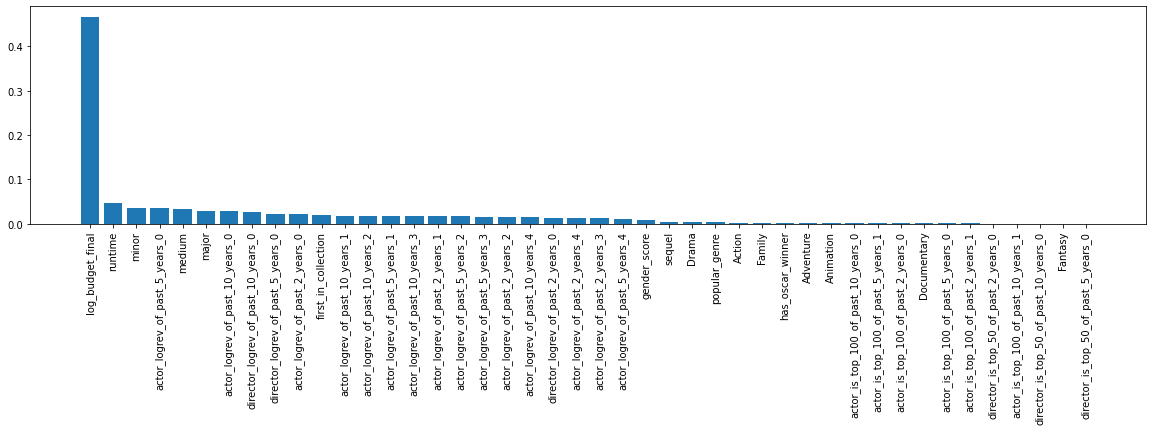

In [73]:
from tqdm import tqdm
lrs = [0.1, 0.05, 0.01]
subsamples = [1]
criterions = ['friedman_mse']
min_samples_leaves = [4, 16, 32]
max_depths = [None]

best_parameter = {}
best_val_mse = float('inf')
parameters = []
for lr in lrs:
    for subsample in subsamples:
        for criterion in criterions:
            for min_samples_leaf in min_samples_leaves:
                for max_depth in max_depths:
                    parameter = {
                        'learning_rate': lr, 'n_estimators': int(10 / lr),
                        'subsample': subsample, 'criterion': criterion,
                        'min_samples_leaf': min_samples_leaf,
                        'min_samples_split': min_samples_leaf * 2,
                        'max_depth': max_depth
                    }
                    parameters.append(parameter)

for parameter in tqdm(parameters):
    model, subtrain_mse, val_mse = run_regression("gbr", parameter, subtrain_X, subtrain_Y, val_X, val_Y)
    if val_mse < best_val_mse:
        best_subtrain_mse = subtrain_mse
        best_val_mse = val_mse
        best_parameter = parameter
print("best_subtrain_mse: {} best_val_mse: {} best_parameter: {}". \
      format(best_subtrain_mse, best_val_mse, best_parameter))

best_model, best_train_mse, best_test_mse = run_regression("gbr", best_parameter, train_X, train_Y, test_X, test_Y)
print("best_train_mse: {} best_test_mse: {} best_parameter: {}".format(best_train_mse, best_test_mse, best_parameter))

import matplotlib.pyplot as plt
feat_importances = sorted(list(zip(feat_col_names, best_model.feature_importances_)), key=lambda x: -x[1])
names = [name for name, _ in feat_importances]
importances = [importance for _, importance in feat_importances]

plt.figure(figsize=(20,4))
plt.bar(names, importances)
plt.xticks(rotation=90)
plt.show()

In [14]:
param = {'learning_rate': 0.01, 'n_estimators': 1000, 'subsample': 1, 'criterion': 'friedman_mse', 'min_samples_leaf': 16, 'min_samples_split': 32, 'max_depth': None}
model, subtrain_mse, val_mse, subtrain_rsq, val_sq = run_regression("gbr", param, subtrain_X, subtrain_Y, val_X, val_Y)
print(subtrain_mse, val_mse, subtrain_rsq, val_sq)

model, train_mse, test_mse, train_rsq, test_sq = run_regression("gbr", param, train_X, train_Y, test_X, test_Y)
print(train_mse, test_mse, train_rsq, test_sq)

0.11536857469193638 3.747513099793651 0.9812299969596187 0.6247766539635972
0.11016779296615892 2.9945807829199045 0.983321155649447 0.6117442867886271


100%|██████████| 9/9 [07:05<00:00, 47.28s/it]


best_subtrain_mse: 0.09950674424370329 best_val_mse: 3.715534638782324 best_parameter: {'learning_rate': 0.05, 'n_estimators': 200, 'subsample': 1, 'criterion': 'friedman_mse', 'min_samples_leaf': 16, 'min_samples_split': 32, 'max_depth': None}
best_train_mse: 0.09253309965229597 best_test_mse: 3.1014191200085826 best_parameter: {'learning_rate': 0.05, 'n_estimators': 200, 'subsample': 1, 'criterion': 'friedman_mse', 'min_samples_leaf': 16, 'min_samples_split': 32, 'max_depth': None}


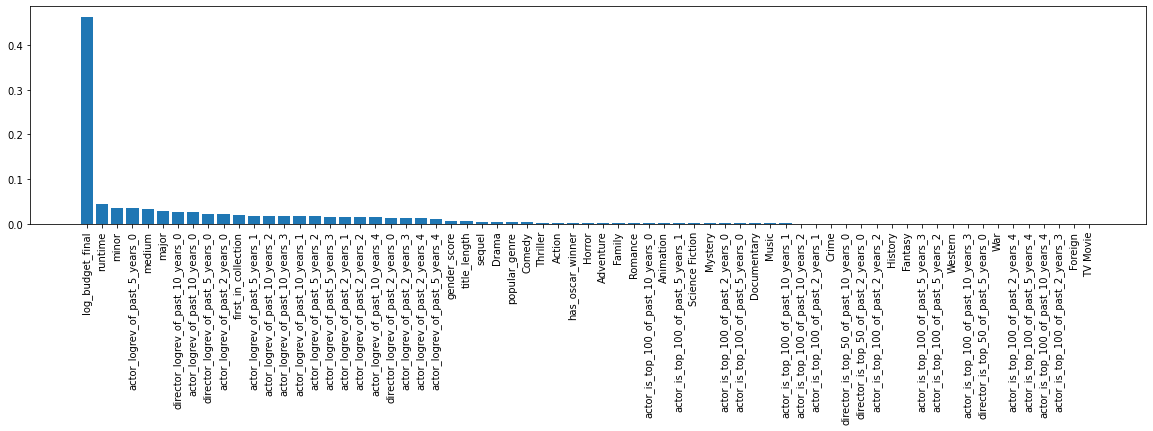

In [53]:
from tqdm import tqdm
lrs = [0.1, 0.05, 0.01]
subsamples = [1]
criterions = ['friedman_mse']
min_samples_leaves = [4, 16, 32]
max_depths = [None]

best_parameter = {}
best_val_mse = float('inf')
best_val_rsq = float('inf')
parameters = []
for lr in lrs:
    for subsample in subsamples:
        for criterion in criterions:
            for min_samples_leaf in min_samples_leaves:
                for max_depth in max_depths:
                    parameter = {
                        'learning_rate': lr, 'n_estimators': int(10 / lr),
                        'subsample': subsample, 'criterion': criterion,
                        'min_samples_leaf': min_samples_leaf,
                        'min_samples_split': min_samples_leaf * 2,
                        'max_depth': max_depth
                    }
                    parameters.append(parameter)

for parameter in tqdm(parameters):
    model, subtrain_mse, val_mse, val_rsq = run_regression("gbr", parameter, subtrain_X, subtrain_Y, val_X, val_Y)
    if val_mse < best_val_mse:
        best_subtrain_mse = subtrain_mse
        best_val_mse = val_mse
        best_val_rsq = val_rsq
        best_parameter = parameter
print("best_subtrain_mse: {} best_val_mse: {} best_parameter: {}". \
      format(best_subtrain_mse, best_val_mse, best_parameter))

best_model, best_train_mse, best_test_mse = run_regression("gbr", best_parameter, train_X, train_Y, test_X, test_Y)
print("best_train_mse: {} best_test_mse: {} best_parameter: {}".format(best_train_mse, best_test_mse, best_parameter))

import matplotlib.pyplot as plt
feat_importances = sorted(list(zip(feat_col_names, best_model.feature_importances_)), key=lambda x: -x[1])
names = [name for name, _ in feat_importances]
importances = [importance for _, importance in feat_importances]

plt.figure(figsize=(20,4))
plt.bar(names, importances)
plt.xticks(rotation=90)
plt.show()